In [26]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_process import arma_generate_sample
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

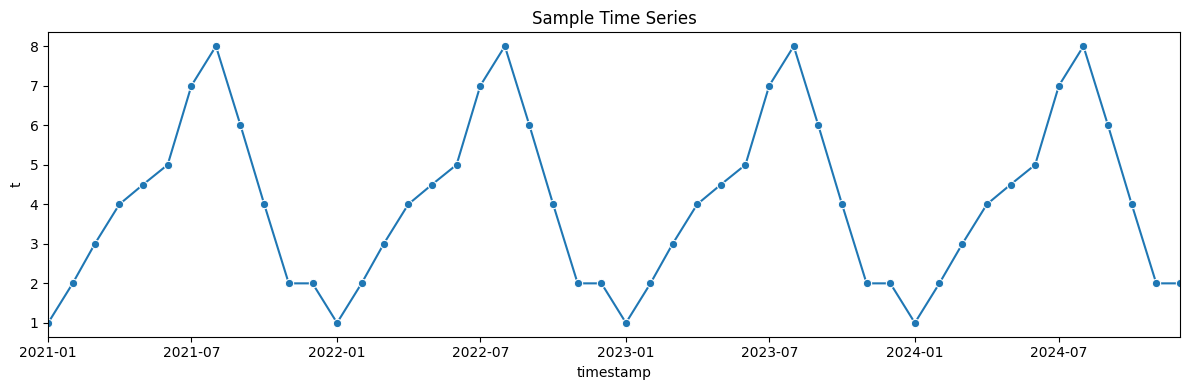

In [27]:
T = 12

sample = pd.DataFrame({'timestamp' : pd.date_range('2021-01-01', periods=48, freq='MS'),
                       't' : [1, 2, 3, 4, 4.5, 5, 7, 8, 6, 4, 2, 2, 1, 2, 3, 4, 4.5, 5, 7, 8, 6, 4, 2, 2, 1, 2, 3, 4, 4.5, 5, 7, 8, 6, 4, 2, 2, 1, 2, 3, 4, 4.5, 5, 7, 8, 6, 4, 2, 2]
                      })

f, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 4))

sns.lineplot(x=sample.timestamp, y=sample['t'], marker='o')
ax.set_xlim([sample.timestamp.iloc[0], sample.timestamp.iloc[-1]])
ax.set_title('Sample Time Series')
plt.tight_layout()
plt.show()

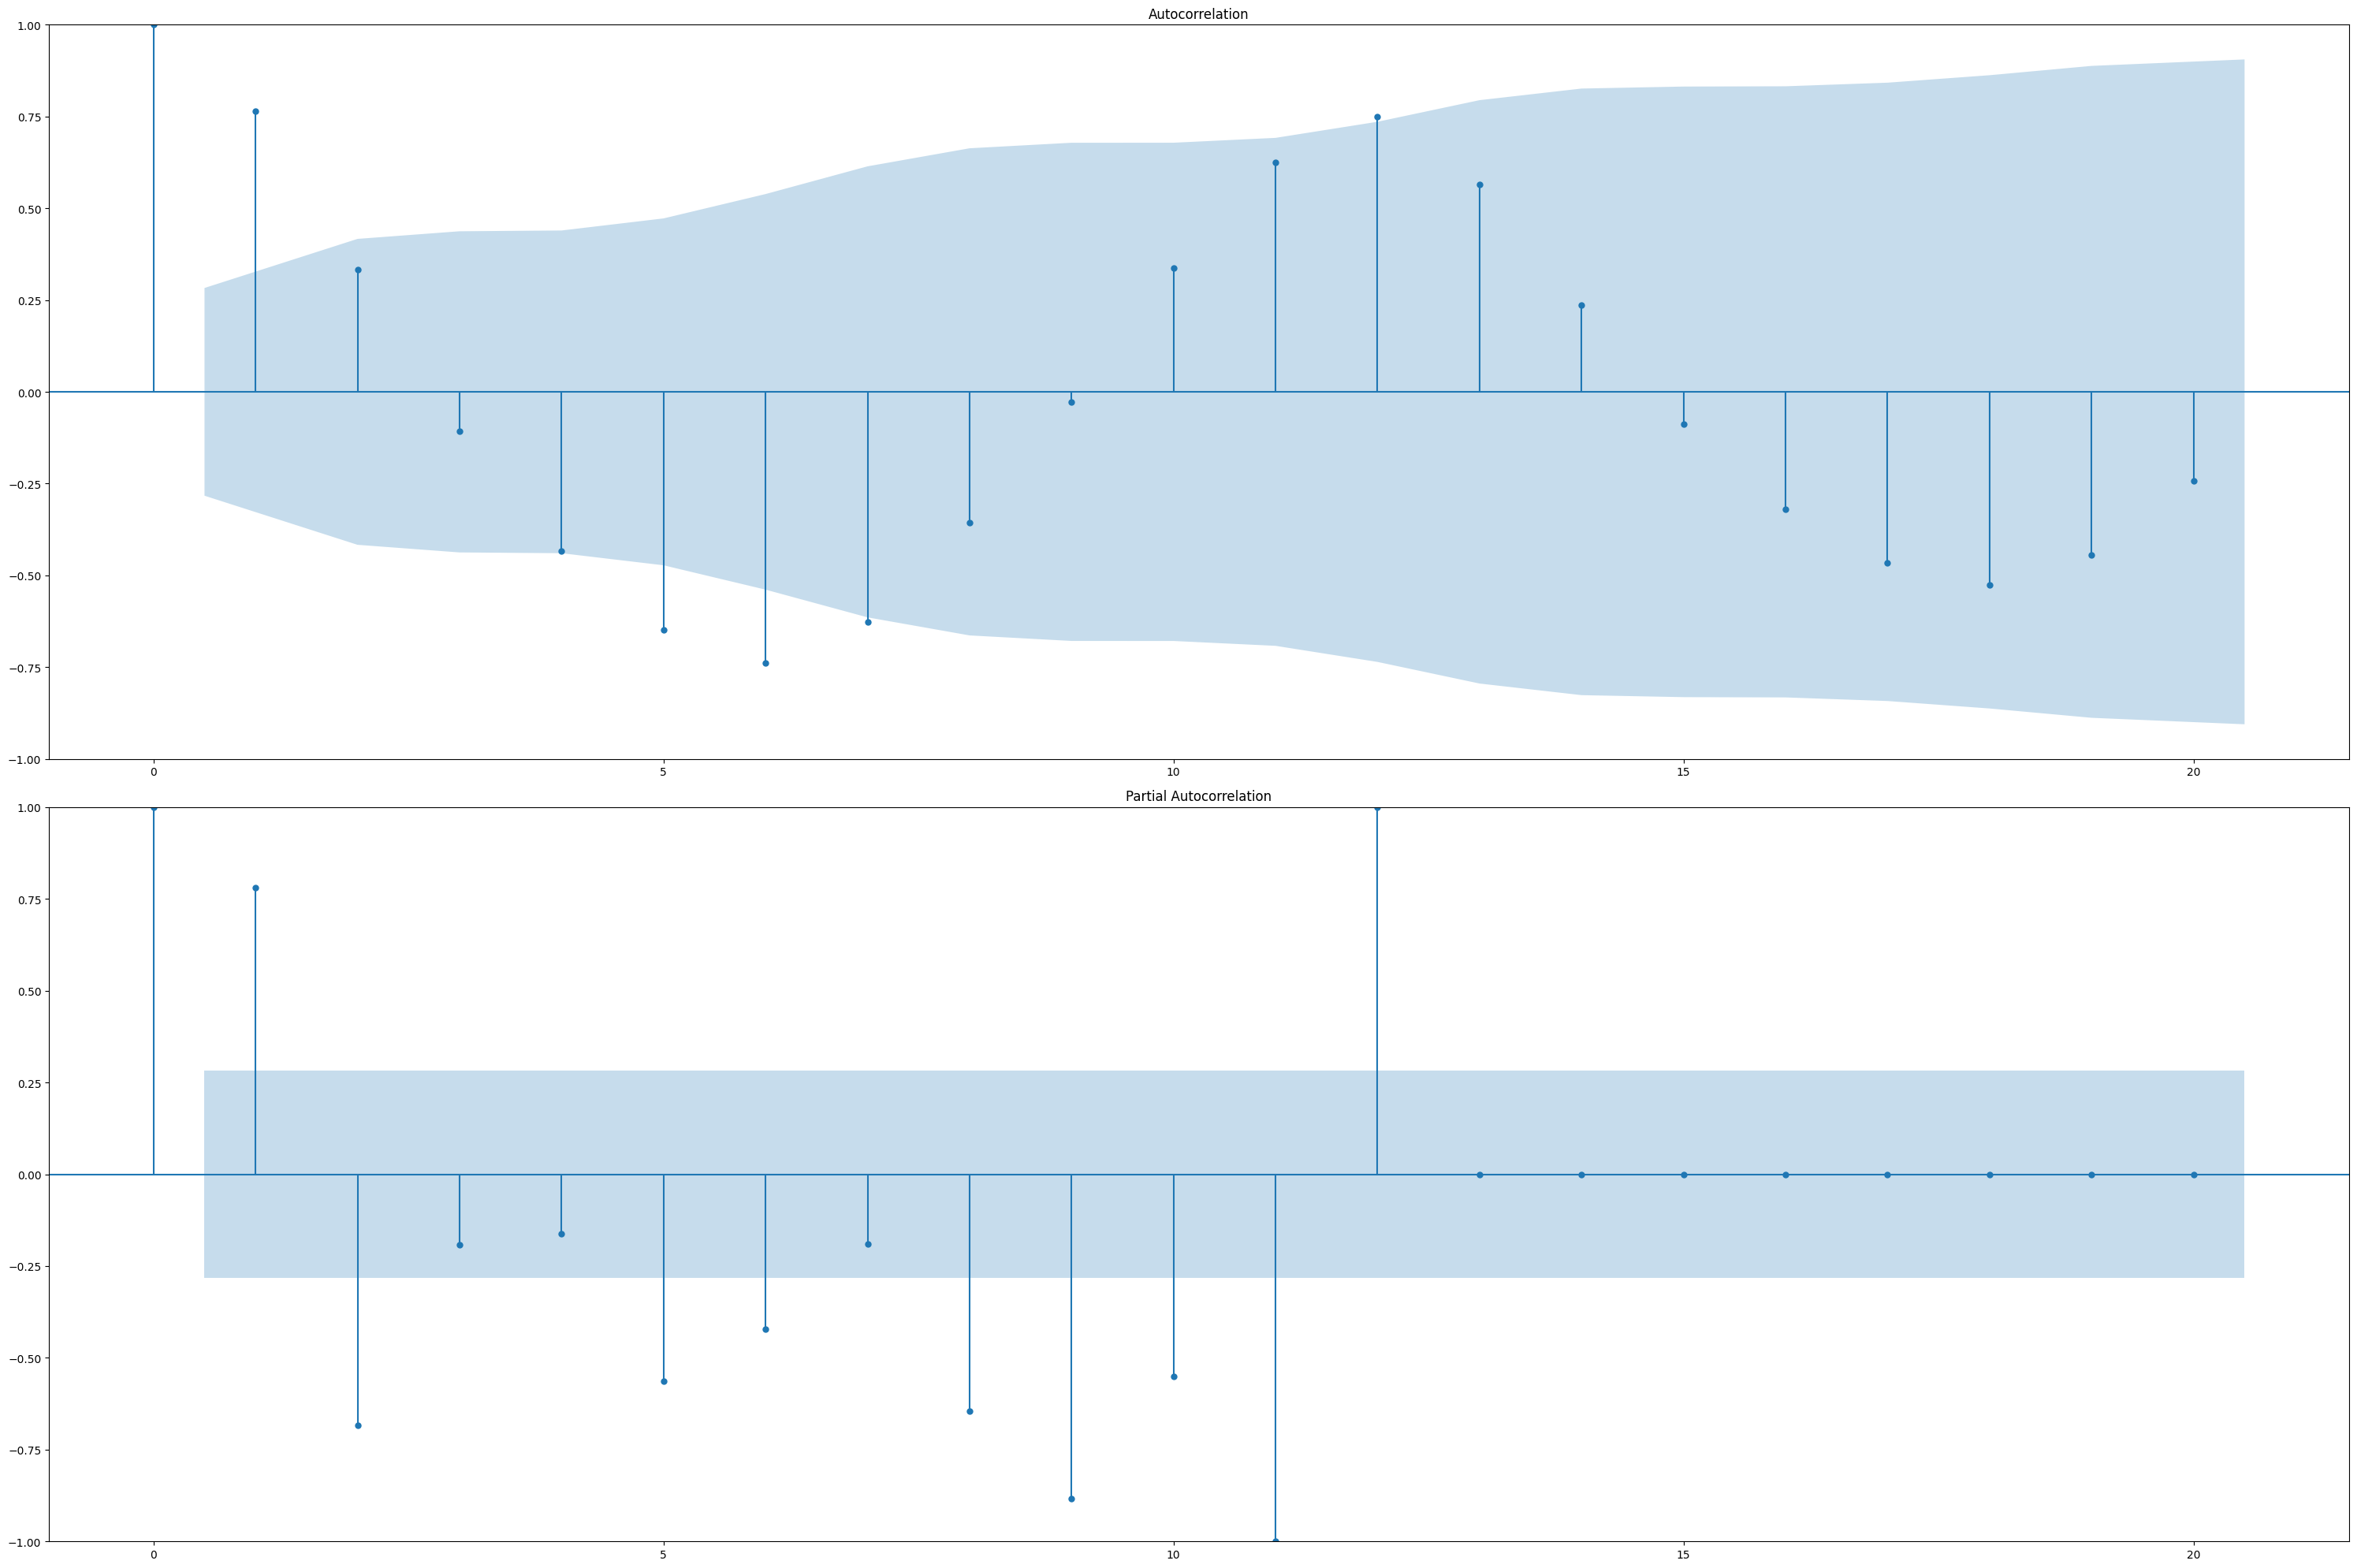

In [28]:
f, ax = plt.subplots(nrows=2, ncols=1, figsize=(30, 20))
plot_acf(sample['t'],lags=20, ax=ax[0])
plot_pacf(sample['t'],lags=20, ax=ax[1], method='ols')

plt.tight_layout()
plt.show()

In [29]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(sample.t, order=(1, 0, 1), seasonal_order=(1, 0, 1, 12))
model = model.fit(disp=False)

print(model.summary())

c:\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


                                     SARIMAX Results                                      
Dep. Variable:                                  t   No. Observations:                   48
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 12)   Log Likelihood                 118.041
Date:                            Fri, 14 Feb 2025   AIC                           -226.082
Time:                                    14:43:11   BIC                           -216.726
Sample:                                         0   HQIC                          -222.546
                                             - 48                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8829      0.108      8.153      0.000       0.671       1.095
ma.L1          0.4434      0.090   

c:\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


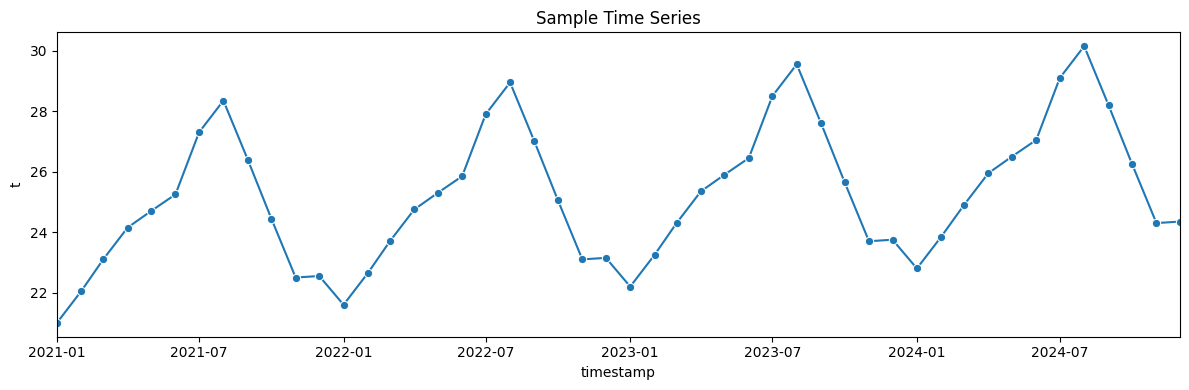

In [30]:
time = np.arange(0, 48)
sample = pd.DataFrame({'timestamp' : pd.date_range('2021-01-01', periods=48, freq='MS'),
                       't' : [1, 2, 3, 4, 4.5, 5, 7, 8, 6, 4, 2, 2, 1, 2, 3, 4, 4.5, 5, 7, 8, 6, 4, 2, 2, 1, 2, 3, 4, 4.5, 5, 7, 8, 6, 4, 2, 2, 1, 2, 3, 4, 4.5, 5, 7, 8, 6, 4, 2, 2] + ((0.05*time)+20)
                      })

f, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 4))

sns.lineplot(x=sample.timestamp, y=sample['t'], marker='o')
ax.set_xlim([sample.timestamp.iloc[0], sample.timestamp.iloc[-1]])
ax.set_title('Sample Time Series')
plt.tight_layout()
plt.show()

Issue with stationarity

In [31]:
sample['t_diff'] = sample['t'].diff().fillna(0)

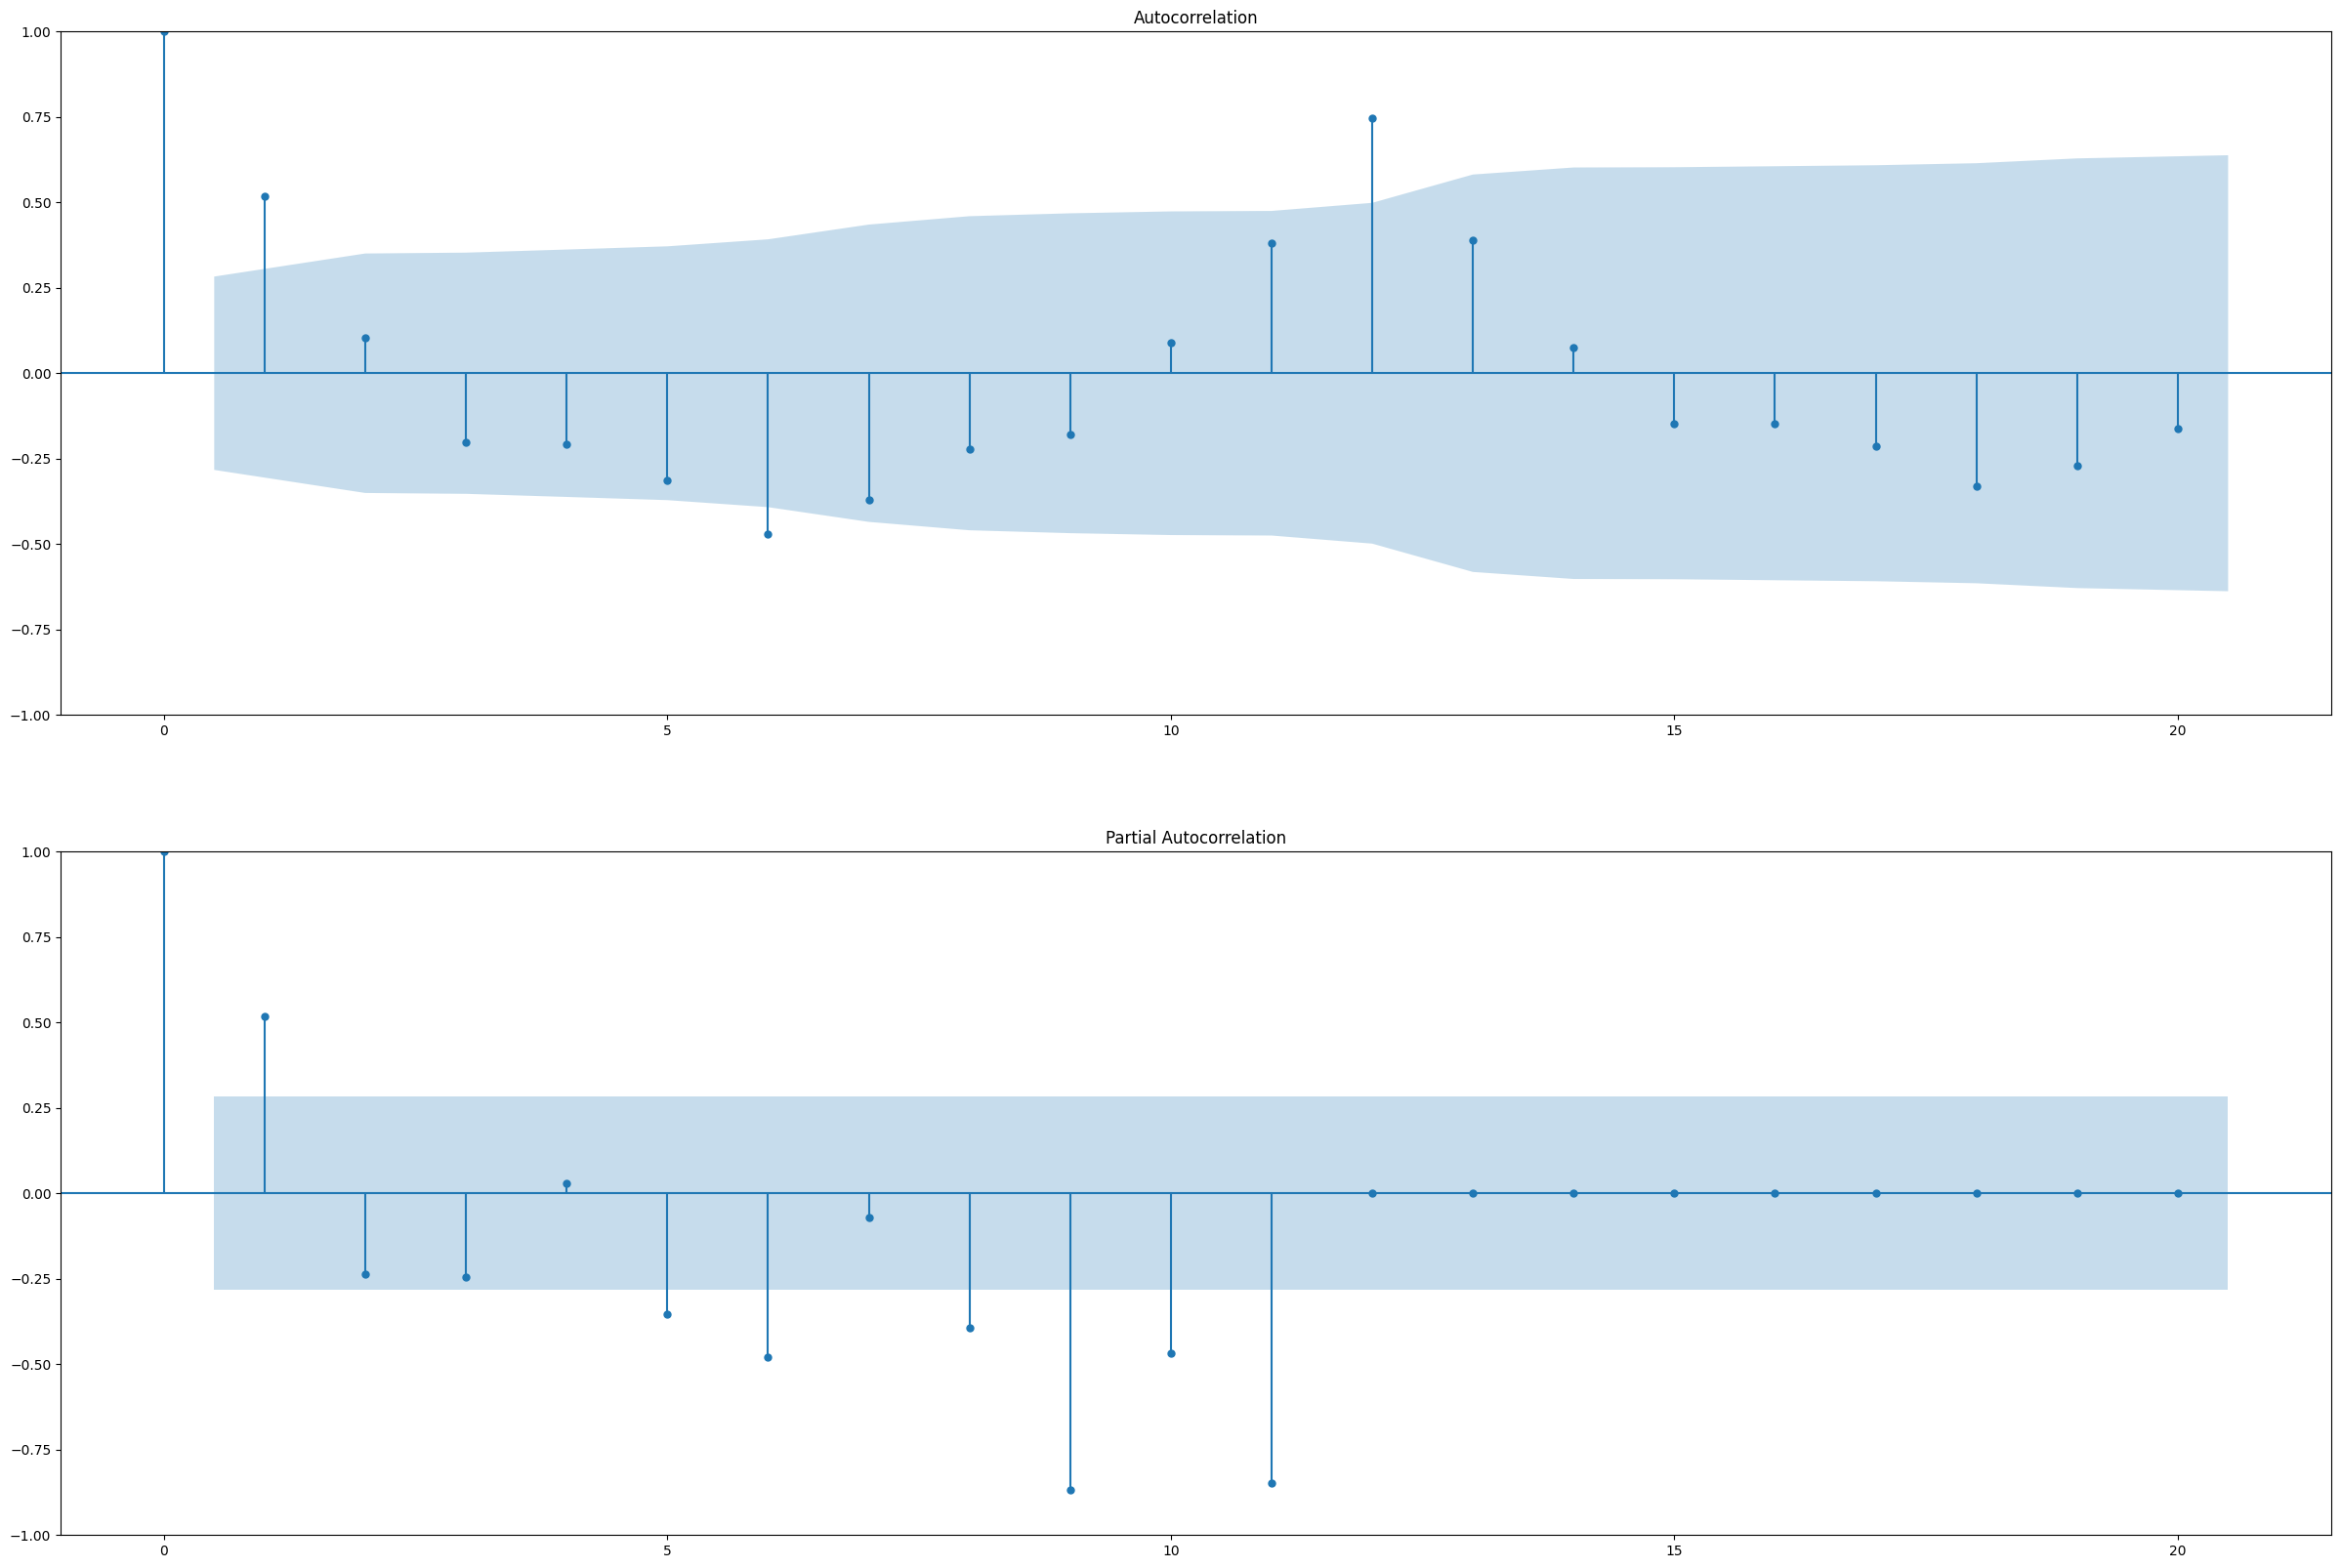

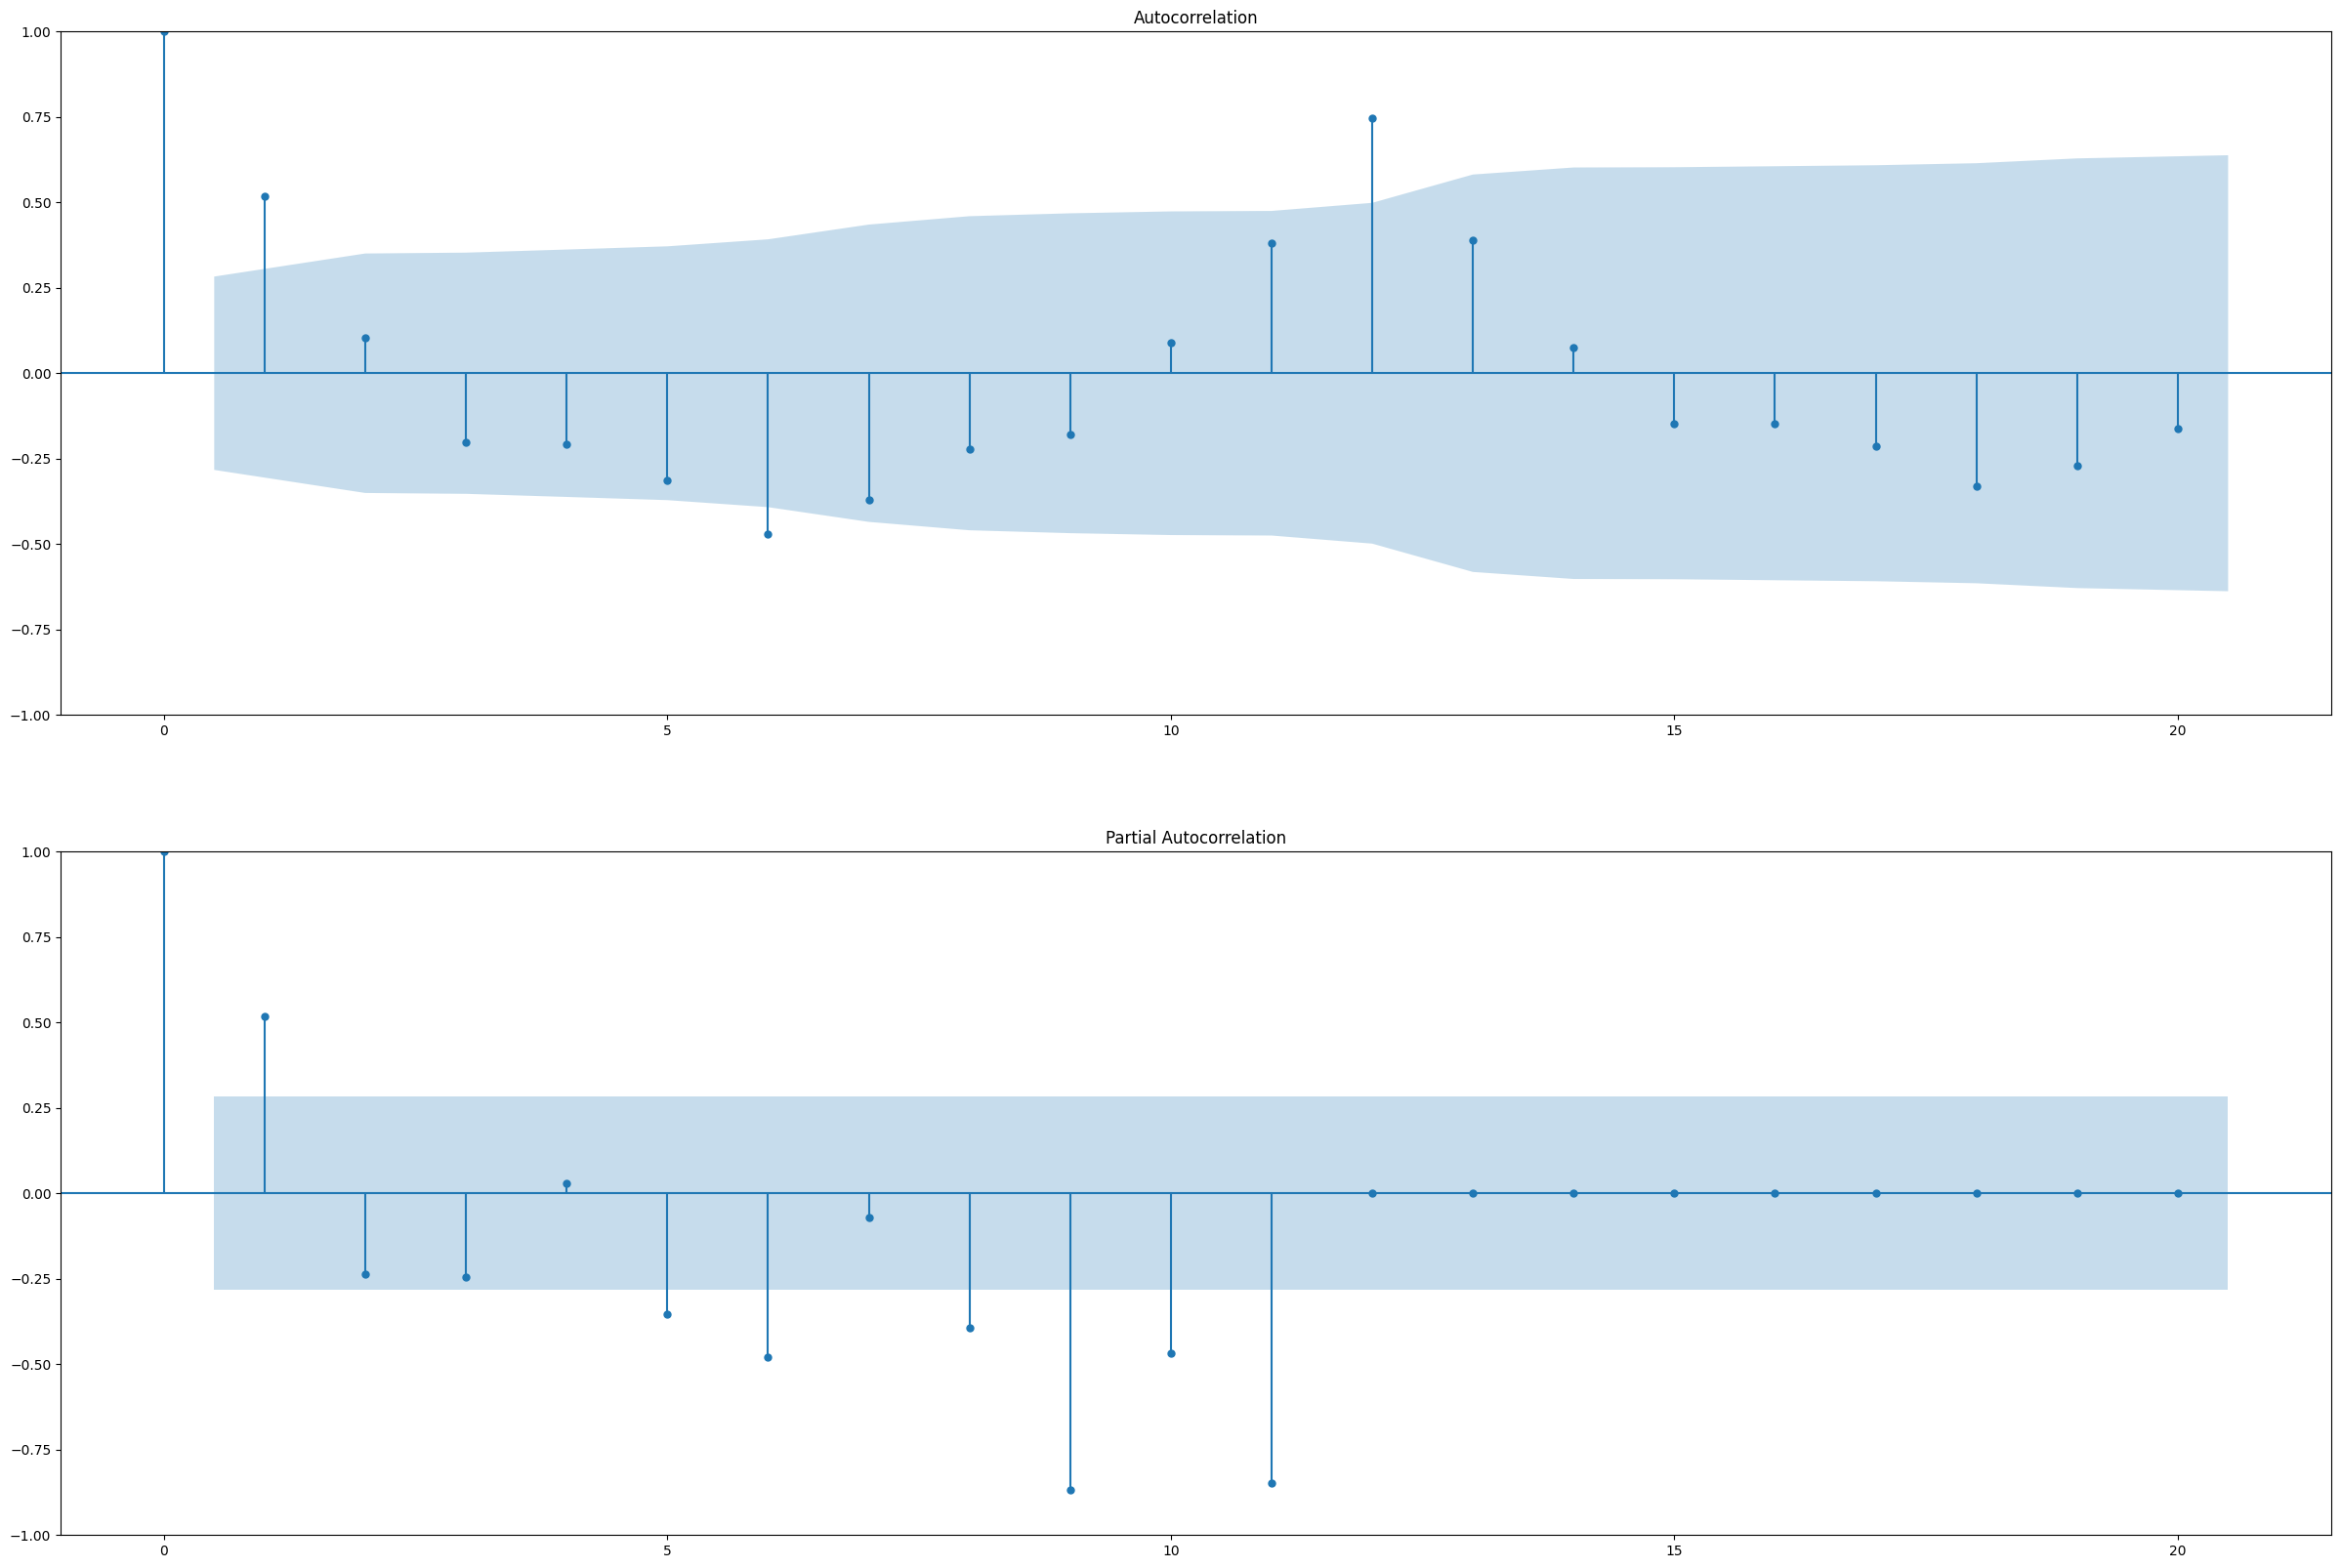

In [32]:
f, ax = plt.subplots(nrows=2, ncols=1, figsize=(30, 20))
plot_acf(sample['t_diff'],lags=20, ax=ax[0])
plot_pacf(sample['t_diff'],lags=20, ax=ax[1], method='ols')

In [33]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(sample.t, order=(1, 0, 1), seasonal_order=(1, 0, 1, 12))
model = model.fit(disp=False)

print(model.summary())

c:\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
c:\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


                                     SARIMAX Results                                      
Dep. Variable:                                  t   No. Observations:                   48
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 12)   Log Likelihood                  90.818
Date:                            Fri, 14 Feb 2025   AIC                           -171.636
Time:                                    14:43:12   BIC                           -162.280
Sample:                                         0   HQIC                          -168.100
                                             - 48                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9988      0.001   1684.974      0.000       0.998       1.000
ma.L1          0.4190      0.061   

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(sample.t, order=(1, 0, 1), seasonal_order=(1, 0, 1, 12)) 
model = model.fit(disp=False)

print(model.summary())

c:\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
c:\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


                                     SARIMAX Results                                      
Dep. Variable:                                  t   No. Observations:                   48
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 12)   Log Likelihood                  90.818
Date:                            Fri, 14 Feb 2025   AIC                           -171.636
Time:                                    14:43:12   BIC                           -162.280
Sample:                                         0   HQIC                          -168.100
                                             - 48                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9988      0.001   1684.974      0.000       0.998       1.000
ma.L1          0.4190      0.061   

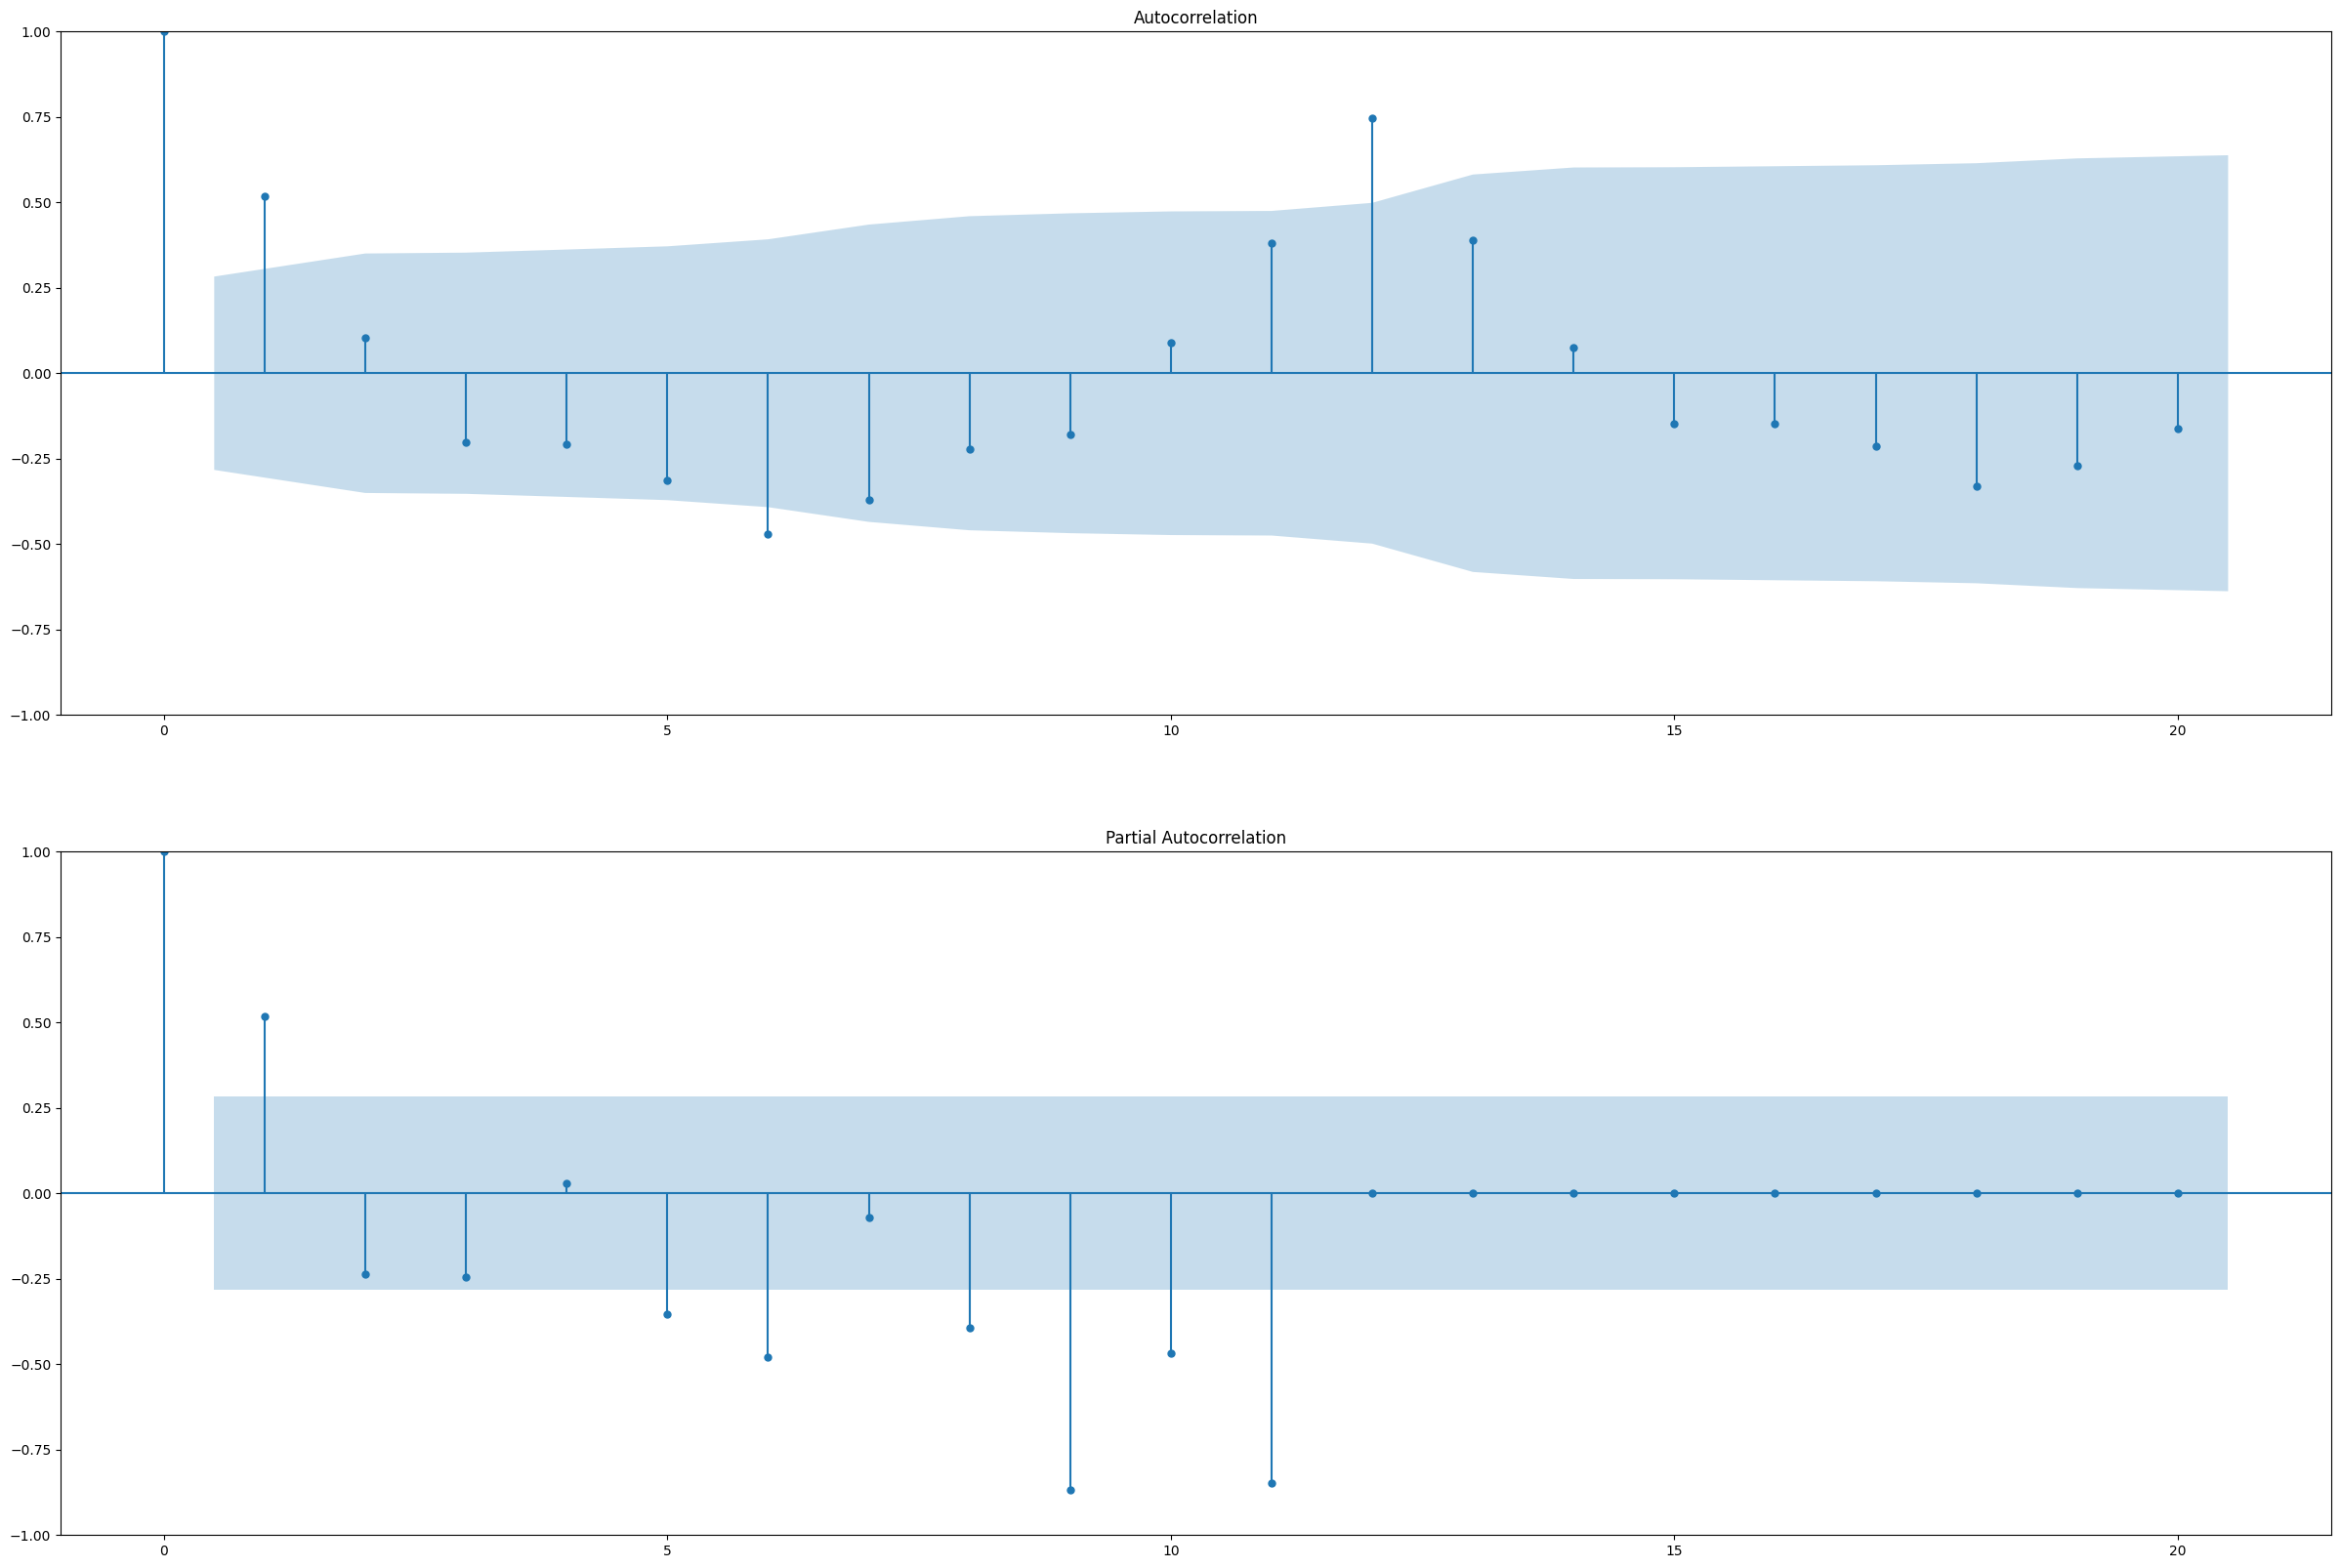

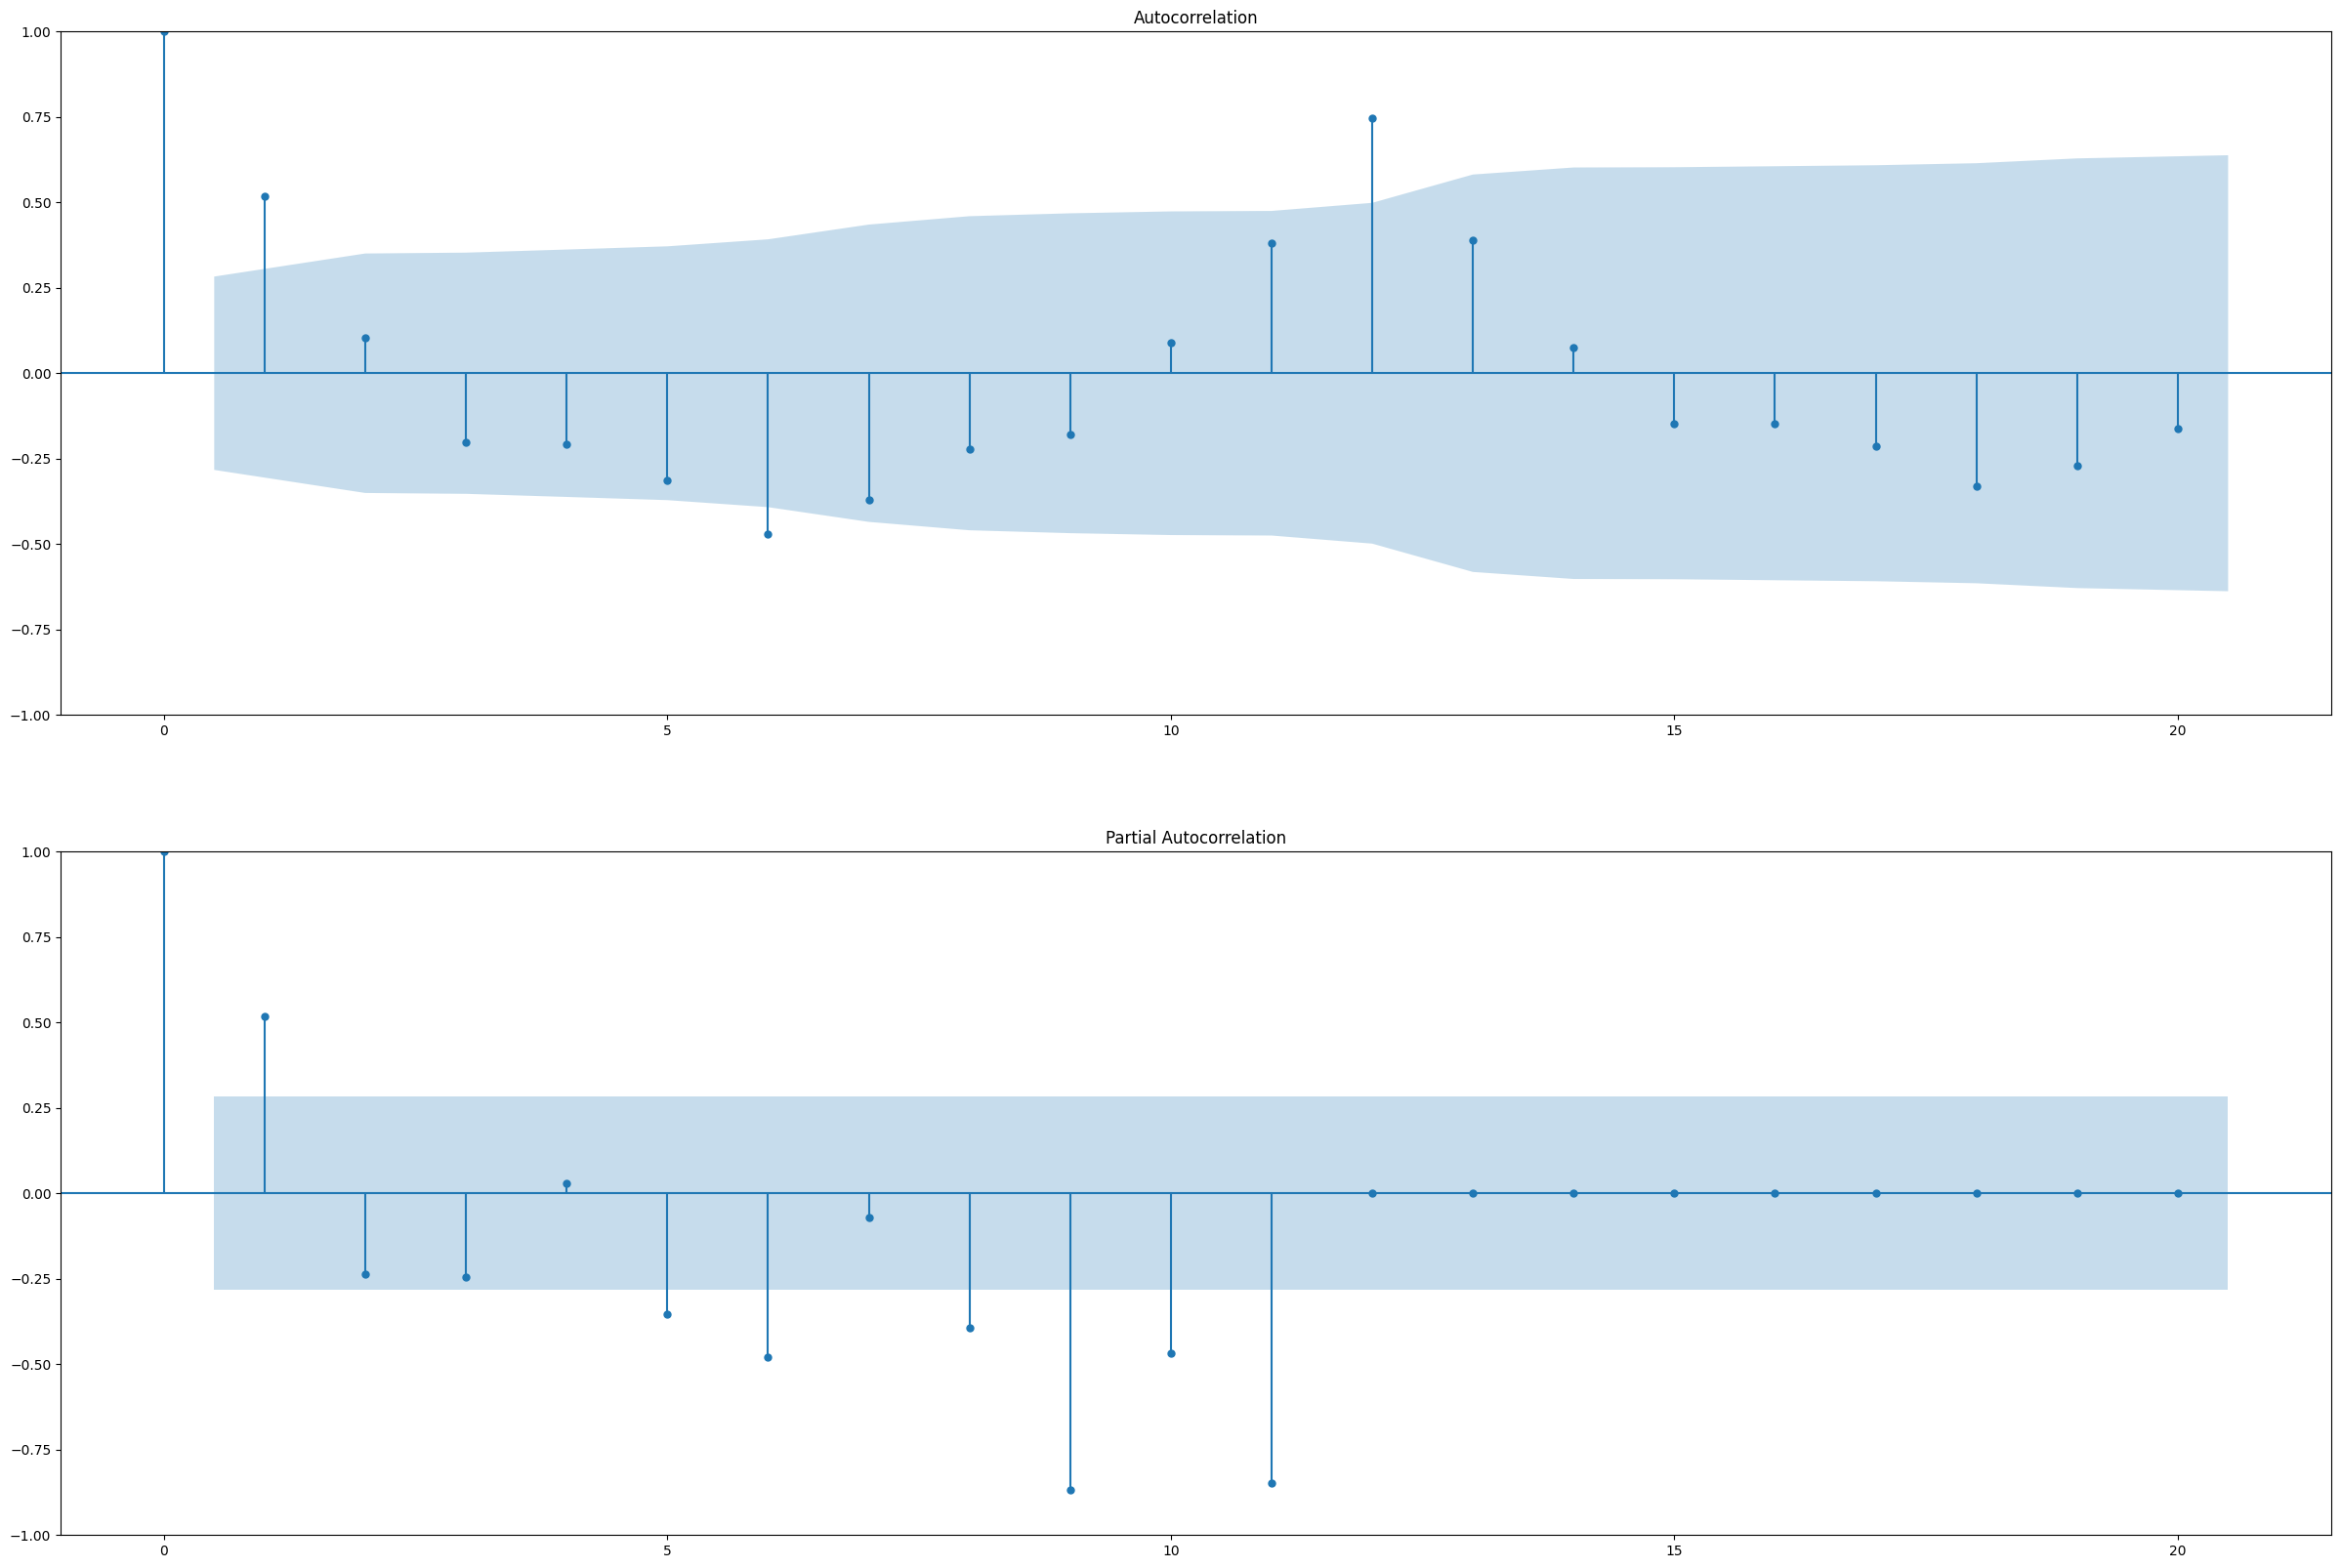

In [35]:
f, ax = plt.subplots(nrows=2, ncols=1, figsize=(30, 20))
plot_acf(sample['t_diff'],lags=20, ax=ax[0])
plot_pacf(sample['t_diff'],lags=20, ax=ax[1], method='ols')